In [1]:
import xarray as xr
from hilde.trajectory import reader
from hilde.green_kubo.heat_flux import get_cumulative_kappa, get_heat_flux_aurocorrelation

%matplotlib inline

In [2]:
import seaborn as sns
sns.set_context('paper', font_scale=1.8)

In [3]:
trajectory = reader('CsPbBr_300K.son', with_stresses=True)

# discard first 200 time steps
traj = trajectory.discard(200)

# get heat flux dataset
ds = traj.heat_flux_dataset

# write to file
ds.to_netcdf('flux.nc')

[GreenKubo]    Parse trajectory
[son] read file:  CsPbBr_300K.son
[GreenKubo]    .. done in 4.328s|||||||||||||||||||||||  4354/4354
[hilde]        .. return only atoms with `stresses` computed
[trajectory]   Discard first 200 atoms
[trajectory]   Discard last  0 atoms
[trajectory]   .. length before: 871
[trajectory]   .. length after:  671
[GreenKubo]    Get positions from trajectory
[GreenKubo]    .. time elapsed: 0.015s
[GreenKubo]    Get velocities from trajectory
[GreenKubo]    .. time elapsed: 0.008s
[GreenKubo]    Get pressure from trajectory
[GreenKubo]    .. time elapsed: 0.094s
[GreenKubo]    Compute heat flux:
[GreenKubo]    .. time elapsed: 0.136s|||||||||  671/671


In [4]:
# read the heat flux dataset
DS = xr.load_dataset('flux.nc')
DS

<xarray.Dataset>
Dimensions:        (atom: 160, i: 3, time: 671)
Coordinates:
  * time           (time) float64 0.0 25.0 50.0 ... 1.67e+04 1.672e+04 1.675e+04
Dimensions without coordinates: atom, i
Data variables:
    heat_flux      (time, atom, i) float64 -0.0008325 0.0002521 ... 5.174e-05
    avg_heat_flux  (time, atom, i) float64 0.002833 -0.002054 ... 0.0002417
    positions      (time, atom, i) float64 -0.04855 6.07 -0.01494 ... 20.57 12.5
    velocities     (time, atom, i) float64 -0.02132 0.01544 ... 0.004441
    forces         (time, atom, i) float64 -0.1002 0.3558 ... 0.2985 -0.2166
    pressure       (time) float64 0.003464 0.00339 0.003296 ... 0.004159 0.00394
    temperature    (time) float64 301.6 313.3 320.3 308.2 ... 299.9 295.1 302.0
Attributes:
    time unit:                     fs
    timestep:                      25.0
    volume:                        6528.916195244442
    symbols:                       ['Pb', 'Pb', 'Pb', 'Pb', 'Pb', 'Pb', 'Pb',...
    flattend re

In [5]:
# Compute heat flux autoccorrelation function
jcorr = get_heat_flux_aurocorrelation(DS)

j = jcorr.sum(axis=(1, 2)).to_series()

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      308.89  K
[GreenKubo]    -> Prefactor:     424024.62  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.614s


In [6]:
# compute cumulative kappa
kappa = get_cumulative_kappa(DS)

k = kappa.sum(axis=(1, 2)).to_series()

[GreenKubo]    Get heat flux autocorrelation from heat flux
[GreenKubo]    Compute Prefactor:
[GreenKubo]    .. Volume:          6528.92  AA^3
[GreenKubo]    .. Temperature:      308.89  K
[GreenKubo]    -> Prefactor:     424024.62  W/mK / (eV/AA^/ps)
[GreenKubo]    .. time elapsed: 0.523s
[GreenKubo]    Integrate heat flux autocorrelation function cumulatively
[GreenKubo]    .. Integrator:   `scipy.integrate.cumtrapz`
[GreenKubo]    .. analytic:      False


(0, 1000)

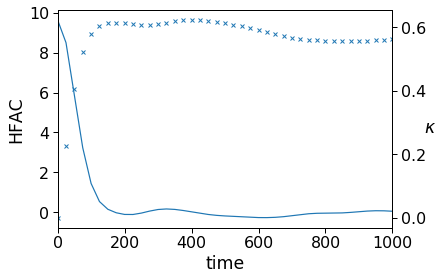

In [7]:
#plot

ax1 = j.plot()
ax1.set_ylabel('HFAC')

ax2 = ax1.twinx()
ax2.plot(k.index, k, 'x')
ax2.set_ylabel(r'$\kappa$', rotation=0)


ax1.set_xlim([0, 1000])